<a href="https://colab.research.google.com/github/VMBoehm/N3AS_Project_Malika/blob/main/10_Copy_of_Copy_of_Copy_of_First_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from sklearn import datasets as datasets
from sklearn import model_selection as ms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#random_seed = 1534

In [ ]:
## TASK: Play with different class_sep parameters, how does the model accuracy degrade/improve?
#dataset = datasets.make_classification(n_samples=1000, n_features=4, random_state=random_seed, class_sep= 3)
## n_features = 5 does something weird, We talked about class_sep last monday.

In [ ]:
#features, labels = dataset
#print(features.shape)

In [ ]:
#plt.scatter(features[:,0],features[:,1], c=labels)
#plt.show()
#plt.scatter(features[:,2],features[:,3], c=labels)
#plt.show()

In [ ]:
#X_train, X_test, y_train, y_test = ms.train_test_split(features,labels, test_size = 0.2)

In [ ]:
#print('X_train:',np.shape(X_train))
#print('y_train:',np.shape(y_train))
#print('X_test:',np.shape(X_test))
#print('y_test:',np.shape(y_test))

In [23]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense


In [22]:
num_classes = 10 
input_shape = (28, 28, 1)

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('X_train:',np.shape(X_train))
print('y_train:',np.shape(y_train))
print('X_test:',np.shape(X_test))
print('y_test:',np.shape(y_test))

X_train: (60000, 28, 28)
y_train: (60000, 10)
X_test: (10000, 28, 28)
y_test: (10000, 10)


In [28]:

basic_model = Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
basic_model.summary()
# Adding layers to the model
# First layers: 16 neurons/perceptrons that takes the input and uses Leaky ReLU activation function.

#basic_model.add(Dense(units = 4 , activation = 'LeakyReLU', input_shape = (4,))) 
# Second layer: 1 neuron/perceptron that takes the input from the 1st layers and gives output as 0 or 1.Activation used is 'Hard Sigmoid'

# TASK: Can you change the output to be probabilistic (probability for each class) by using 'softmax' as an activation function?
#basic_model.add(Dense(1, activation = 'hard_sigmoid'))
### This is what I added. I think this is right.
#basic_model.add(Dense(2, activation='softmax'))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)             

In [29]:
# TASK optional): How does the Adam optimizer work? 
# from googling I have learned that the adam Optimizer is a Stochastic optimization. Which means its does graident optmaztion. I am acutally not really sure how it works
## I found this paper about it https://arxiv.org/pdf/1412.6980.pdf but its a little hard to understand.
## I know that basically it find how to get down hill the fastest
opt = keras.optimizers.Adam(learning_rate=0.01)
#TASK: What is binary cross entropy? What does it measure?
basic_model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
## the Binary cross entropy is ued for our loss paramter which calculates the degree of errror. A neural network measures doesn't measure 
# acurracy but instead loss. This is than used to measure accuracy. Binary_crossentropy is used when you have a binary system like cats or dogs or 1 and 0




In [30]:
# TASK: add validation data (https://keras.io/api/models/model_training_apis/)
#basic_model.fit(X_train, y_train, epochs=50, validation_data= (X_test, y_test))
basic_model.fit(X_train, y_train, batch_size=128, epochs=2, validation_data= (X_test, y_test))

Epoch 1/2
469/469 [==============================] - 48s 102ms/step - loss: 1.0545 - accuracy: 0.8362 - val_loss: 0.1264 - val_accuracy: 0.9599
Epoch 2/2
469/469 [==============================] - 50s 107ms/step - loss: 0.2976 - accuracy: 0.9105 - val_loss: 0.1406 - val_accuracy: 0.9560


In [31]:
loss_and_metrics = basic_model.evaluate(X_test, y_test)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])


313/313 [==============================] - 3s 10ms/step - loss: 0.1406 - accuracy: 0.9560
Loss =  0.14063075184822083
Accuracy =  0.9559999704360962


In [48]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)


In [49]:
## calulating accuracy from scartch
## so this is a binary acuraccy calcuation
from sklearn.preprocessing import normalize
#y_test = y_test[:, 0]
probs = basic_model.predict(X_test)
preds = probs[:,1]

y_pred = (preds >= .5).astype('int')

#y_pred = y_pred[:, 0]
y_pred_train = (X_train >= .5).astype('int')
y_pred_train = y_pred_train[:, 0]

def compute_tp_tn_fn_fp(act, pred):

	tp = sum((act == 1) & (pred == 1))
	tn = sum((act == 0) & (pred == 0))
	fn = sum((act == 1) & (pred == 0))
	fp = sum((act == 0) & (pred == 1))
	return tp, tn, fp, fn

# tp_t, tn_t, fp_t, fn_t = compute_tp_tn_fn_fp(y_train,y_pred)

tp_k, tn_k, fp_k, fn_k = compute_tp_tn_fn_fp(y_test_5,y_pred )

def compute_accuracy(tp, tn, fn, fp):
  return((tp + tn) * 100)/ float( tp + tn + fn + fp)
  
#print("test acuuracy",compute_accuracy(tp_e, tn_e, fn_e, fp_e))

#print("train accuracy",compute_accuracy(tp_t, tn_t, fp_t, fn_t))

print("test acuuracy",compute_accuracy(tp_k, tn_k, fn_k, fp_k))


test acuuracy 88.61


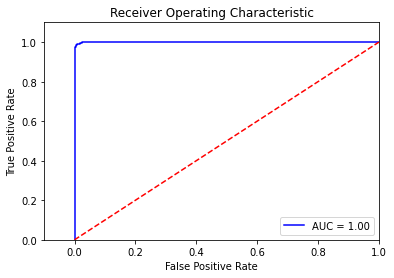

In [56]:
import sklearn.metrics as metrics
probs = basic_model.predict(X_test)
preds = probs[:,0]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()